# Week4 授業前課題1 アヤメの分類

## テキストの目的
- 教師あり学習（分類問題）の概観を知る
- scikit-laernを使い分類を行えるようにする
- 手法の簡単な比較をする

## 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト


## 練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。こうすることで2次元の散布図を描き確認することができます。また、問題を単純化するためアヤメの種類を2つだけ使うことにします。分類対象が2種類の場合を 2値分類 と呼び、それ以上の 多値分類 とは区別をします。それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。

## 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

- virgicolorとvirginica
- sepal_lengthとpetal_length

《実際の問題では？》

実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# アイリスデータを変数に格納
iris_dataset = load_iris()
# pandas データに変換。その際にカラム名も指定する。
X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

# pandasデータに変換。目的変数（ターゲット）が対象。
y = pd.DataFrame(iris_dataset.target, columns=["Species"])

print("種類の名前 : {}".format(iris_dataset.target_names))

df = pd.concat([X, y], axis=1)
df.head()

種類の名前 : ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# virgicolorとvirginica
df_selected = df.query("Species == [1, 2]").loc[:, ["sepal_length", "petal_length", "Species"]]
df_selected.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [4]:
df_selected = df.query("Species > 0").loc[:, ["sepal_length", "petal_length", "Species"]]
df_selected.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [5]:
#query()において、Species==[1,2]はSpecies in [1,2]と書ける
df_selected = df.query("Species in [1,2] ").loc[:, ["sepal_length", "petal_length", "Species"]]
df_selected.head()

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [24]:
df_selected.loc[:, ["sepal_length", "petal_length"]]

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6
55,5.7,4.5
56,6.3,4.7
57,4.9,3.3
58,6.6,4.6
59,5.2,3.9


### 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

《実際の問題では？》

このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。

今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

重なり合っている部分があるため、これらで分類することは難しい

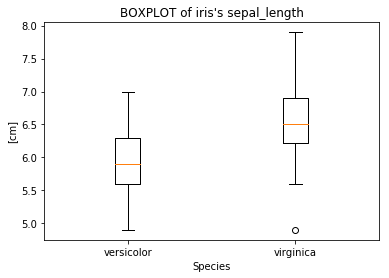

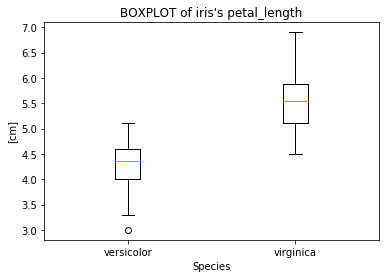

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt


features =["sepal_length","petal_length",]

# # 箱ひげ図
for feature in features:
    plt.boxplot([df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1,2,],iris_dataset.target_names[1:])
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.ylabel("[cm]")
    plt.xlabel("Species")
    plt.show()
    

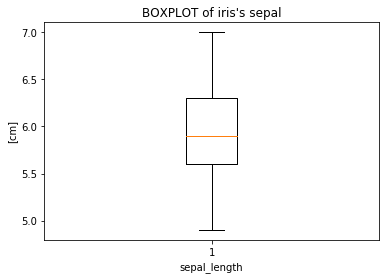

In [13]:
#箱ひげ、簡易
df_vc=df.query("Species == 1")
df_vc_sl=df_vc["sepal_length"]
plt.boxplot(df_vc_sl)
plt.title("BOXPLOT of iris's sepal")
plt.ylabel("[cm]")
plt.xlabel("sepal_length")
plt.show()

In [18]:
# print(df_vc)
# print(df_vc_sl)

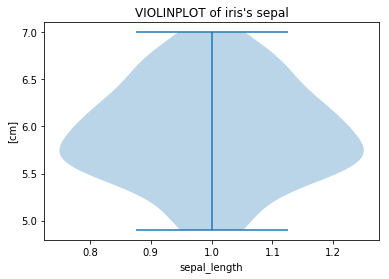

In [16]:
#バイオリン図
plt.violinplot(df_vc_sl)
plt.title("VIOLINPLOT of iris's sepal")
plt.ylabel("[cm]")
plt.xlabel("sepal_length")
plt.show()

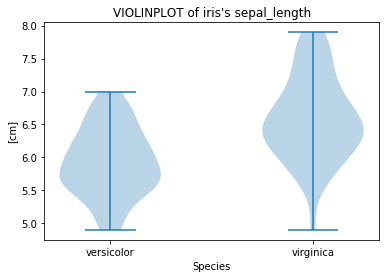

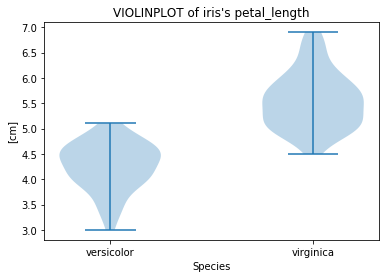

In [17]:
for feature in features:
    plt.violinplot([df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1,2,],iris_dataset.target_names[1:])
    plt.title("VIOLINPLOT of iris's {}".format(feature))
    plt.ylabel("[cm]")
    plt.xlabel("Species")
    plt.show()

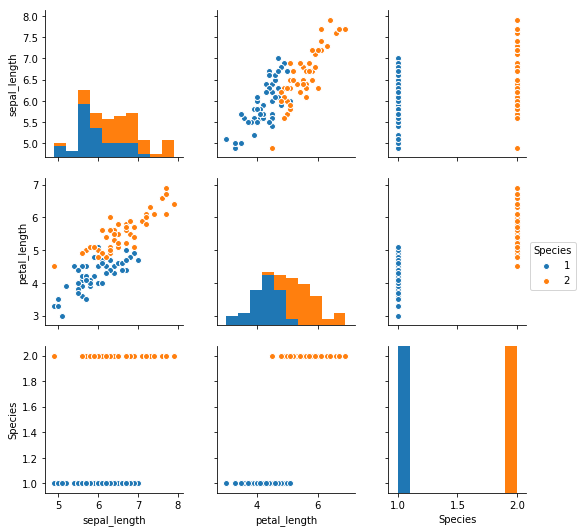

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.pairplot(df_selected, hue='Species') # 散布図行列の描画、カテゴリで色分け、seabornとpandasを使うと、ペアプロット図（散布図行列）を簡単に作成
#引数hueにカテゴリデータが格納された列の列名を指定すると、そのカテゴリごとに色分けしたグラフが生成される。

### 【問題3】前処理・訓練用データと検証用データの分割

前処理の一貫として、訓練用（train）データと検証用（validation）データの分割を行います。今回は訓練用データ75%、検証用データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

《注意点》

データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。

《分割する理由》

分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練用データ、検証に使うデータが検証用データで、一般的に7対3から8対2程度の割合にします。

シード値で固定して、ランダムにシャッフル
当然だが、順番で並んでいるものをシャッフルしないと使い物にならない。
しかし天気や株価など時系列で並んでいることに意味があるデータはシャッフルしない

X_train: トレーニング用の特徴行列(slやplの大きさ)
X_test: テスト用の特徴行列
y_train: トレーニング用の目的変数（Species:1 or 2）
y_test: テスト用の目的変数

train_test_split には以下のような引数を与えます。

第一引数: 特徴行列 X
第二引数: 目的変数 y
test_size=: テスト用のデータを何割の大きさにするか
test_size=0.3 で、3割をテスト用のデータとして置いておけます
random_state=: データを分割する際の乱数のシード値
同じ結果が返るように 0 を指定していますが、これは勉強用であり普段は指定しません

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_selected.iloc[:, :-1], df_selected.loc[:, "Species"], test_size=0.25, random_state=1)
# random_state:シード値、test_size＝割合
#df_selected.iloc[:, :-1]:slとpl、df_selected.loc[:, "Species"]:そのまま
print("X_train.shape : {}, X_test.shape : {}".format(X_train.shape, X_test.shape))

X_train.shape : (75, 2), X_test.shape : (25, 2)


In [28]:
print(X_train)

print(X_test)
print(y_train)
print(y_test)

     sepal_length  petal_length
65            6.7           4.4
90            5.5           4.4
146           6.3           5.0
59            5.2           3.9
122           7.7           6.7
61            5.9           4.2
97            6.2           4.3
135           7.7           6.1
78            6.0           4.5
143           6.8           5.9
55            5.7           4.5
116           6.5           5.5
115           6.4           5.3
85            6.0           4.5
66            5.6           4.5
99            5.7           4.1
84            5.4           4.5
57            4.9           3.3
145           6.7           5.2
77            6.7           5.0
69            5.6           3.9
131           7.9           6.4
75            6.6           4.4
112           6.8           5.5
63            6.1           4.7
74            6.4           4.3
53            5.5           4.0
67            5.8           4.1
88            5.6           4.1
58            6.6           4.6
..      

TypeError: 'Int64Index' object is not callable

### 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

《注意点》

標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証用データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。

《実際の問題での前処理は？》

アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [33]:
#sklernから標準化するモデルをインポートする
from sklearn.preprocessing import StandardScaler
#モデルをインスタンス化して、モデルの中のメソッドを使えるようにする
scaler = StandardScaler()

#標準化する(訓練用のデータ(X_train)で.fitを行う)
scaler.fit(X_train)

#標準化する(訓練用、検証用双方で.transformを行う)、transformとは？
X_train_transformed= scaler.transform(X_train)
X_test_transformed= scaler.transform(X_test)

fit()
渡されたデータの最大値、最小値、平均、標準偏差、傾き...などの統計を取得して、内部メモリに保存する。

transform()
fit()で取得した統計情報を使って、渡されたデータを実際に書き換える。

fit_transform()
fit()を実施した後に、同じデータに対してtransform()を実施する。

### 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練用データです。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation

学習が終わった後、検証用データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

transformer (変換器) は X (と y) を入力して、変換された X’ を出力するクラスです。
パラメータを決定する(例えば、標準化なら平均・分散値を保持しておく必要があります) fit, 入力を変換する transform, 両者の処理を一度に行う fit_transformというメソッド

estimator (推定器), は (X, y) を入力して y’ を出力するクラスです。いわゆる狭義の学習アルゴリズムです。もう少し細かいことをいうと、 推定器はさらに regressor (回帰器) と classifier (分類器) の2種類に分類

モデルインスタンス生成
clf = SVC()
clf = LogisticRegression()
fitさせる (学習)
clf.fit(X_train, y_train)
predictする (予測)
y_pred = clf.predict(X_test)
回帰も分類も生成するモデルのクラスを変えるだけで、様々なモデルを簡単に構築できます。

scikit-learnの流れ
データセットの読み込み
訓練データとテストデータの準備
画像データを配列にしたもの(numpy.ndarray型)
画像データに対する数字(numpy.ndarray型)。ラベルと言う
訓練データとテストデータに分ける

訓練データとラベルで学習
clf.fit(X_train, y_train)
モデルの評価
テストデータで試した正解率を返す
accuracy = clf.score(X_test, y_test)
print(f"正解率{accuracy}")

学習済モデルを使ってテストデータを分類した結果を返す
predicted = clf.predict(X_test)

詳しいレポート
precision(適合率): 選択した正解/選択した集合
recall(再現率) : 選択した正解/全体の正解
F-score(F値) : 適合率と再現率はトレードオフの関係にあるため
print("classification report")
print(metrics.classification_report(y_test, predicted))


In [34]:
from sklearn.neighbors import KNeighborsClassifier
#モデルに引数を渡してインスタンス化する
neigh_1 = KNeighborsClassifier(n_neighbors= 1)#デフォルトは5
neigh_3 = KNeighborsClassifier(n_neighbors= 3)
neigh_5 = KNeighborsClassifier()

#学習する(訓練用データを.fitする)
neigh_1.fit(X_train_transformed, y_train)
neigh_3.fit(X_train_transformed, y_train)
neigh_5.fit(X_train_transformed, y_train)

#推定する(検証用データを.predictする)
y_pred_neigh_1=neigh_1.predict(X_test_transformed)
y_pred_neigh_3=neigh_3.predict(X_test_transformed)
y_pred_neigh_5=neigh_5.predict(X_test_transformed)

In [36]:
print("1-nnの推定結果: {}".format(y_pred_neigh_1))
print("3-nnの推定結果: {}".format(y_pred_neigh_3))
print("5-nnの推定結果: {}".format(y_pred_neigh_5))
#1,3の推定結果は同じ、5は６番目の値が異なる

1-nnの推定結果: [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
3-nnの推定結果: [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
5-nnの推定結果: [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


### 【問題6】評価
検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

scikit-learnを使い4種類の指標を計算する  
混同行列をscikit-learnを使い表示する  
4種類の指標値の意味について簡単に調査して文章でまとめる  
sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation

sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation

sklearn.metrics.recall_score — scikit-learn 0.21.3 documentation

sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation

sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation

In [37]:
#モデルmetricsでaccuracy等のインポート不要
from sklearn import metrics

#評価する関数の作成
def evaluate(y_true, y_pred):
    acc =metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall= metrics.recall_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    confusion=metrics.confusion_matrix(y_test, y_pred)
    return acc, precision, recall, f1, confusion

# モデルmetrics をimportすればaccuracy等を一つずつインポートしなくても良い
from sklearn import metrics 

# 評価する関数を作成する
def evaluate(y_true, y_pred):
    """
    2値分類の評価指標を計算する
    """
    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    confusion = metrics.confusion_matrix(y_test, y_pred)
    return acc, precision, recall, f1, confusion

print("1-nn")
print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred_neigh_1)))
print("------")

print("3-nn")
print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred_neigh_3)))
print("------")

print("5-nn")
print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred_neigh_5)))

#formatにアスタリスク、タプルで帰ってきた値をアンパックしてformatメソッドに渡している
#変数の数と要素の数が一致していないとエラーになる。変数名にアスタリスク*をつけると、要素がリストとしてまとめて代入される。

1-nn
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]
------
3-nn
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]
------
5-nn
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
confusion matrix 
 [[13  1]
 [ 4  7]]


【指標値】  
- 真陽性 : TP (True-Positive):ポジティブに分類すべきアイテムを正しくポジティブに分類できた件数を指します。
スパムフィルタの場合、「スパム」と分類すべきメールを「スパム」のフォルダに正しく分類できた件数を指します。
- 真陰性: TN (True-Negative)
ネガティブに分類すべきアイテムを正しくネガティブに分類できた件数を指します。
スパムフィルタの場合、「スパムでない」と分類すべきメールを「スパムでない」のフォルダに正しく分類できた件数を指します。
- 偽陽性: FP (False-Positive)
ネガティブに分類すべきアイテムを誤ってポジティブに分類した件数を指します。
スパムフィルタの場合、「スパムでない」と分類すべきメールを「スパム」のフォルダに誤って分類した件数を指します。
- 偽陰性: FN (False-Negative)
ポジティブに分類すべきアイテムを誤ってネガティブに分類した件数を指します。
スパムフィルタの場合、「スパム」に分類すべきメールを「スパムでない」のフォルダに誤って分類した件数を指します。

- Accuracy（正解率：本来ポジティブに分類すべきアイテムをポジティブに分類し、本来ネガティブに分類すべきアイテムをネガティブに分類できた割合」を示し、以下の式で表されます。  
Accuracy = (TP + TN) / (TP + TN + FP + FN)  

- Precision（適合率、精度）:ポジティブに分類されたアイテムのうち、実際にポジティブであったアイテムの割合」を示し、以下の式で表されます。  
Precision = TP / (TP + FP)

- Recall（再現率）：本来ポジティブに分類すべきアイテムを、正しくポジティブに分類できたアイテムの割合」を示し、以下の式で表されます。
検出率は、真陽性率 (TPR, True-Positive Rate) または、感度 (Sensitivity) とも呼ばれます。
Recall = TPR = Sensitivity = TP / (TP + FN)
- F値 ：F 値 (F-measure, F-score, F1 Score とも呼ばれます) とは、精度 (Precision) と検出率 (Recall) をバランス良く持ち合わせているかを示す指標です。つまり、精度は高くても、検出率が低いモデルでないか、逆に、検出率は高くても、精度が低くなっていないか、といった評価を示します。
F 値は、以下の式のように、検出精度 (Precision) と、検出率 (Recall) の調和平均で求められ、0 〜 1 の間の数値で出力され、0 の場合最も悪い評価、1 の場合最も良い評価となります。

F1 = 2 * (precision * recall) / (precision + recall)

### 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練用データまたは検証用データを与えます。

In [39]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

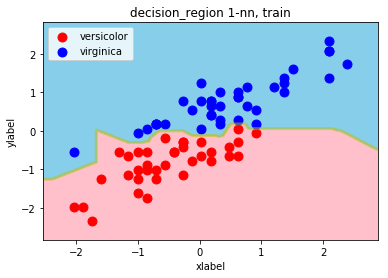

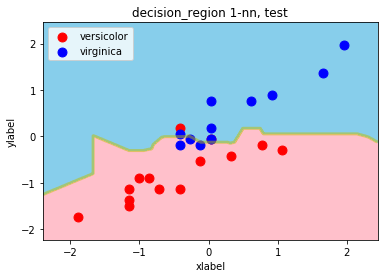

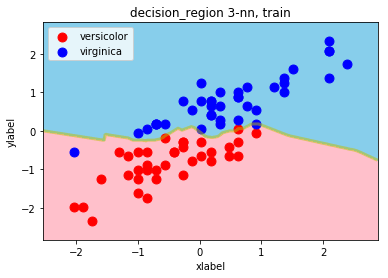

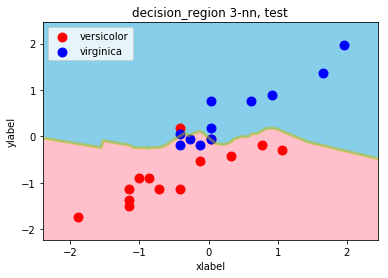

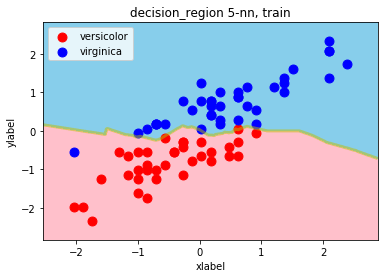

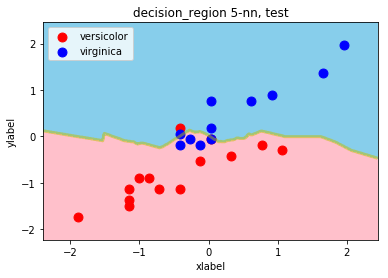

In [41]:
models = [neigh_1, neigh_3, neigh_5]

model_names = ["1-nn", "3-nn", "5-nn"]

#可視化 zip()forループで複数のリストの要素を取得
for model, model_names in zip(models, model_names):
    decision_region(X_train_transformed, y_train, model, title="decision_region {}, {}".format(model_names, "train"))
    decision_region(X_test_transformed, y_test, model, title="decision_region {}, {}".format(model_names, "test"))

### 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト  

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation
sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVC — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation
《実際の問題では？》

ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。

1-nn
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]


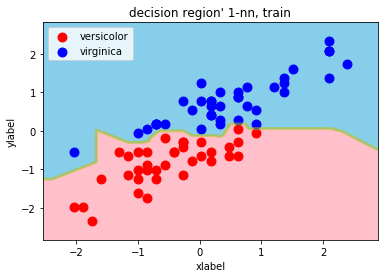

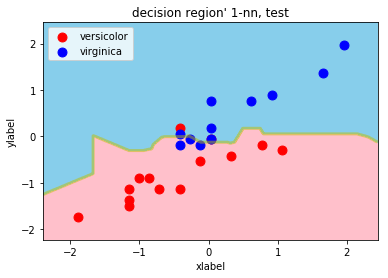

3-nn
acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]


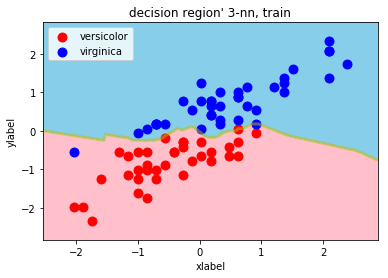

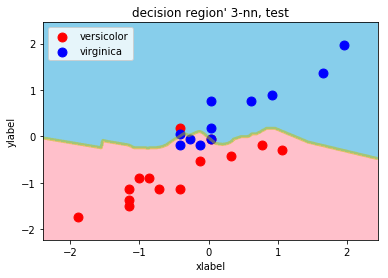

5-nn
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
confusion matrix 
 [[13  1]
 [ 4  7]]


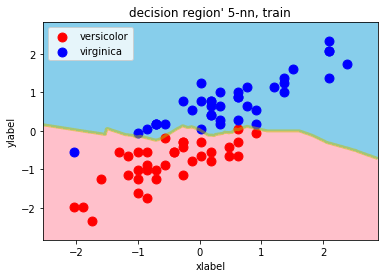

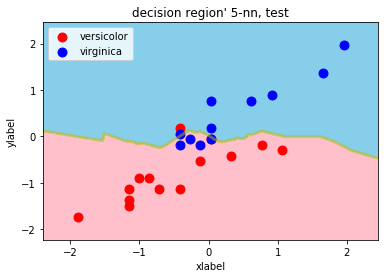

Logistic Regression
acc : 0.84
precision : 0.8125
recall : 0.9285714285714286
f1 : 0.8666666666666666
confusion matrix 
 [[13  1]
 [ 3  8]]


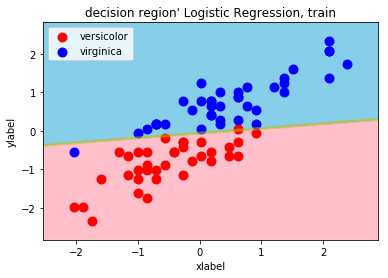

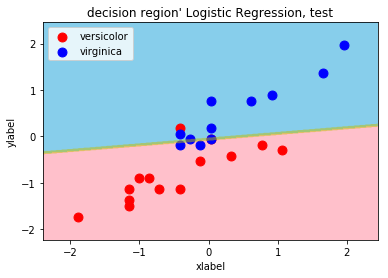

SVM
acc : 0.84
precision : 0.8571428571428571
recall : 0.8571428571428571
f1 : 0.8571428571428571
confusion matrix 
 [[12  2]
 [ 2  9]]


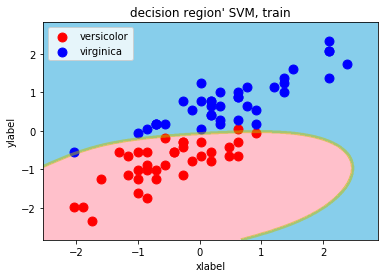

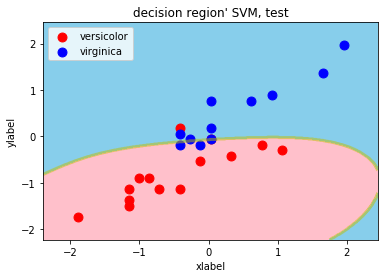

Decision Tree
acc : 0.84
precision : 0.8125
recall : 0.9285714285714286
f1 : 0.8666666666666666
confusion matrix 
 [[13  1]
 [ 3  8]]


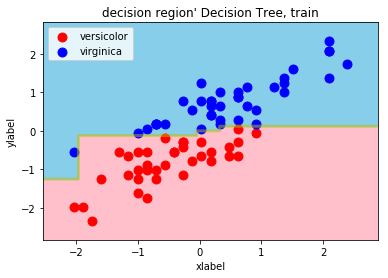

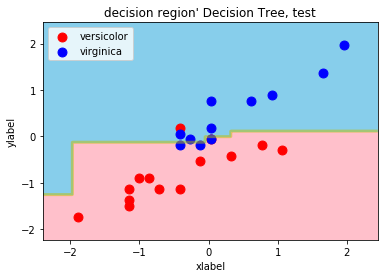

Random Forest
acc : 0.8
precision : 0.7647058823529411
recall : 0.9285714285714286
f1 : 0.8387096774193549
confusion matrix 
 [[13  1]
 [ 4  7]]


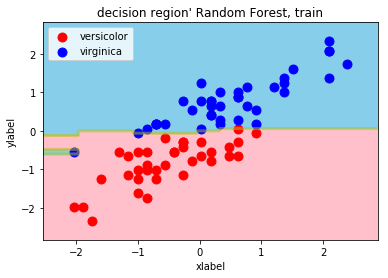

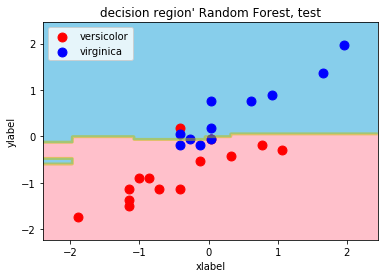

In [45]:
# sklearnのから各種モデルをimportする
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# importしたモデルをインスタンス化
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_5 = KNeighborsClassifier(n_neighbors=5)
logistic_reg = LogisticRegression()
svc = SVC()
tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# 可視化
models = [neigh_1, neigh_3, neigh_5, logistic_reg, svc, tree, random_forest]
model_names = ["1-nn", "3-nn", "5-nn", "Logistic Regression", "SVM", "Decision Tree", "Random Forest"]
for model, model_name in zip(models, model_names):
    print(model_name)
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    
    print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred)))
    decision_region(X_train_transformed, y_train, model, title="decision region' {}, {}".format(model_name, "train"))
    decision_region(X_test_transformed, y_test, model, title="decision region' {}, {}".format(model_name, "test"))

acc : 0.84
precision : 0.8125
recall : 0.9285714285714286
f1 : 0.8666666666666666
confusion matrix 
 [[13  1]
 [ 3  8]]


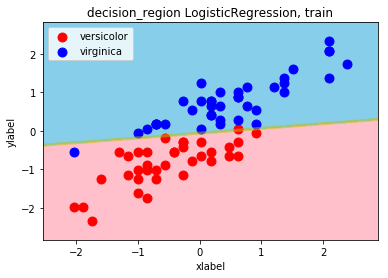

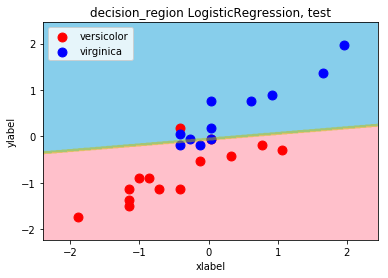

In [47]:
model =logistic_reg
model_names ="LogisticRegression"
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred)))
decision_region(X_train_transformed, y_train, model, title="decision_region {}, {}".format(model_names, "train"))
decision_region(X_test_transformed, y_test, model, title="decision_region {}, {}".format(model_names, "test"))

acc : 0.84
precision : 0.8571428571428571
recall : 0.8571428571428571
f1 : 0.8571428571428571
confusion matrix 
 [[12  2]
 [ 2  9]]


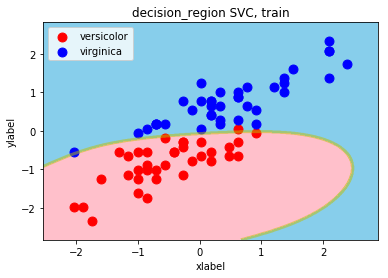

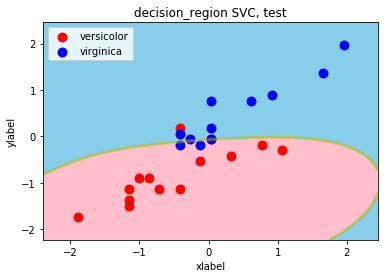

In [49]:
model =svc
model_names ="SVC"
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred)))
decision_region(X_train_transformed, y_train, model, title="decision_region {}, {}".format(model_names, "train"))
decision_region(X_test_transformed, y_test, model, title="decision_region {}, {}".format(model_names, "test"))

acc : 0.84
precision : 0.8125
recall : 0.9285714285714286
f1 : 0.8666666666666666
confusion matrix 
 [[13  1]
 [ 3  8]]


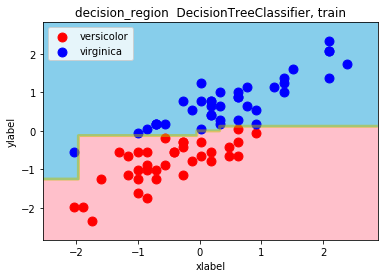

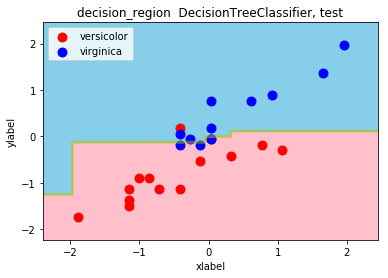

In [50]:
model =tree
model_names =" DecisionTreeClassifier"
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred)))
decision_region(X_train_transformed, y_train, model, title="decision_region {}, {}".format(model_names, "train"))
decision_region(X_test_transformed, y_test, model, title="decision_region {}, {}".format(model_names, "test"))

acc : 0.8
precision : 0.8
recall : 0.8571428571428571
f1 : 0.8275862068965518
confusion matrix 
 [[12  2]
 [ 3  8]]


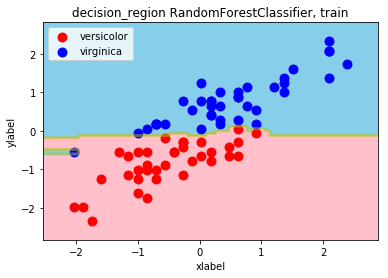

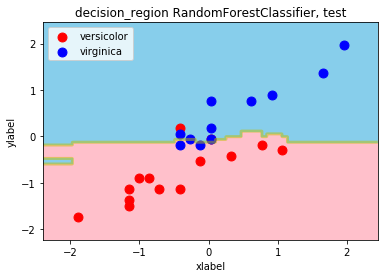

In [51]:
model =random_forest
model_names ="RandomForestClassifier"
model.fit(X_train_transformed, y_train)
y_pred = model.predict(X_test_transformed)

print("acc : {}\nprecision : {}\nrecall : {}\nf1 : {}\nconfusion matrix \n {}".format(*evaluate(y_test, y_pred)))
decision_region(X_train_transformed, y_train, model, title="decision_region {}, {}".format(model_names, "train"))
decision_region(X_test_transformed, y_test, model, title="decision_region {}, {}".format(model_names, "test"))

【考察】
正解率はランダムフォレスト以外同じ値だったが、再現率ではロジスティック回帰と決定木が好ましいと感じた。
